In [2]:
#%matplotlib notebook
import sys
import os
import glob

# Standard modules used through the notebook 
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from bundle_adjust import data_loader as loader
from bundle_adjust import ba_timeseries
import pickle

# Display and interface settings (just for the notebook interface)
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(linewidth=150)

### Check std single date (in the overlapping areas) and std along time

In [66]:
def compute_metrics(exp_name, ba_method, over_time=True, pc3dr=False, use_cdsms=False, plot=False):

    def open_std_file(fn):
        im = np.array(Image.open(fn))
        im[abs(im) > 50] = np.nan
        return im
    
    
    rec4D_dir = os.path.join(exp_name, '{}/4D'.format(ba_method))
    t_ids = sorted([loader.get_id(fn) for fn in glob.glob('{}/dsms/std/*.tif'.format(rec4D_dir))])
    n_dates = len(t_ids)

    # get mean std per date
    dir_suffix = 'dsms/std' if not use_cdsms else 'metrics/std_per_date'
    std_per_date_dir = '{}{}{}'.format(rec4D_dir, '/pc3dr/' if pc3dr else '/', dir_suffix) 
    std_per_date_files = ['{}/{}.tif'.format(std_per_date_dir, t_id) for t_id in t_ids]
    stacked_std_per_date = np.dstack([open_std_file(fn) for fn in std_per_date_files])
    avg_std_per_date = [np.nanmean(stacked_std_per_date[:, :, i], axis=(0, 1)) for i in range(n_dates)]

    if over_time:
        std_over_time_dir = '{}{}{}'.format(rec4D_dir, '/pc3dr/' if pc3dr else '/', 'metrics_over_time')
        std_over_time_file = os.path.join(std_over_time_dir, 'std_over_time.tif')
        std_over_time = open_std_file(std_over_time_file)
        a = np.sum(std_over_time.flatten()[~np.isnan(std_over_time.flatten())]<1.0)
        pct = a/np.sum(1*~np.isnan(std_over_time.flatten())) * 100.

    thr_std_over_time = 1.1
    if plot:
        plt.figure(figsize=(15, 15))
        plt.imshow(~(std_over_time< thr_std_over_time), cmap='gray')
        plt.axis('off')
        plt.show()
    a = np.sum(std_over_time.flatten()[~np.isnan(std_over_time.flatten())]<thr_std_over_time)
    pct = a/np.sum(1*~np.isnan(std_over_time.flatten())) * 100.
        
    print('\n\n******************** DSM registration metrics ********************', flush=True)
    print('  - ba_method: {}'.format(ba_method), flush=True)
    print('  - over_time: {}'.format(over_time), flush=True)
    print('  - pc3dr: {}'.format(pc3dr), flush=True)
    print('  - use_cdsms: {}\n'.format(use_cdsms), flush=True)
    print('mean std along time: {:.3f}'.format(np.nanmean(std_over_time, axis=(0, 1))), flush=True)
    print('mean std per date: {:.3f}\n'.format(np.mean(avg_std_per_date[1:])), flush=True)
    print('detailed std per date:', flush=True)
    for k, (t_id, v) in enumerate(zip(t_ids, avg_std_per_date)):
        print('({}/{}) {}:  {:.3f}'.format(k+1, n_dates, t_id, v), flush=True)
    print('******************************************************************\n\n', flush=True)
    
    return avg_std_per_date, std_over_time



******************** DSM registration metrics ********************
  - ba_method: init
  - over_time: True
  - pc3dr: False
  - use_cdsms: True

mean std along time: 3.688
mean std per date: 1.387

******************************************************************




******************** DSM registration metrics ********************
  - ba_method: init
  - over_time: True
  - pc3dr: True
  - use_cdsms: True

mean std along time: 2.122
mean std per date: 0.290

******************************************************************




******************** DSM registration metrics ********************
  - ba_method: ba_seq_n0_60k_ALL
  - over_time: True
  - pc3dr: False
  - use_cdsms: True

mean std along time: 6.577
mean std per date: 0.275

******************************************************************




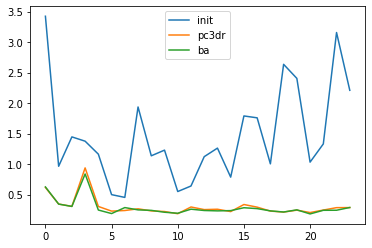

In [8]:
exp_dir = 'exp/coal_opencv'
ba_method = 'init'
pc3dr = False
dense = True
over_time = True

mean_std_per_date1, std_over_time1 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)


exp_dir = 'exp/coal_opencv'
ba_method = 'init'
pc3dr = True
dense = True
over_time = True

mean_std_per_date2, std_over_time2 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)


exp_dir = 'exp/coal_opencv'
ba_method = 'ba_seq_n0_60k_ALL'
pc3dr = False
dense = True
over_time = True

mean_std_per_date3, std_over_time3 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)

plt.figure()
plt.plot(mean_std_per_date1)
plt.plot(mean_std_per_date2)
plt.plot(mean_std_per_date3)
ax = plt.gca()
ax.legend(['init', 'pc3dr', 'ba'])
plt.show();

/home/rogermm14/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """




******************** DSM registration metrics ********************
  - ba_method: init
  - over_time: True
  - pc3dr: False
  - use_cdsms: True

mean std along time: 2.478
mean std per date: 2.733

detailed std per date:
(1/3) 20190127_175045:  3.350
(2/3) 20190128_174855:  3.078
(3/3) 20190128_204710:  2.387
******************************************************************




******************** DSM registration metrics ********************
  - ba_method: init
  - over_time: True
  - pc3dr: True
  - use_cdsms: True

mean std along time: 2.528
mean std per date: 0.394

detailed std per date:
(1/3) 20190127_175045:  1.129
(2/3) 20190128_174855:  0.375
(3/3) 20190128_204710:  0.412
******************************************************************




******************** DSM registration metrics ********************
  - ba_method: ba_seq_n0_60k_ALL
  - over_time: True
  - pc3dr: False
  - use_cdsms: True

mean std along time: 2.540
mean std per date: 0.420

detailed std per date:
(

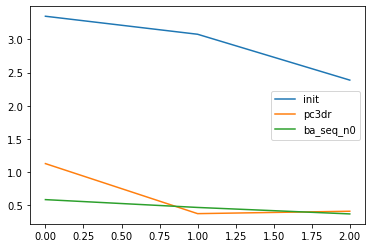

In [25]:
exp_dir = 'exp/morenci_3t_60k'
ba_method = 'init'
pc3dr = False
dense = True
over_time = True

mean_std_per_date1, std_over_time1 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)


exp_dir = 'exp/morenci_3t_60k'
ba_method = 'init'
pc3dr = True
dense = True
over_time = True

mean_std_per_date2, std_over_time2 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)


exp_dir = 'exp/morenci_3t_60k'
ba_method = 'ba_seq_n0_60k_ALL'
pc3dr = False
dense = True
over_time = True

mean_std_per_date3, std_over_time3 = compute_metrics(exp_dir, ba_method,
                                                     over_time=over_time, pc3dr=pc3dr, use_cdsms=dense)

plt.figure()
plt.plot(mean_std_per_date1)
plt.plot(mean_std_per_date2)
plt.plot(mean_std_per_date3)
ax = plt.gca()
ax.legend(['init', 'pc3dr', 'ba_seq_n0'])
plt.show();

In [30]:
import glob
from PIL import Image
from bundle_adjust import data_loader as loader

def get_mask_and_its_polygon(aoi_path, dsm_res):
    from IS18 import utils
    from bundle_adjust import geojson_utils
    from bundle_adjust import data_loader as loader
    
    dsm_res = float(dsm_res)
    corrected_aoi_lonlat = loader.load_pickle(aoi_path)
    corrected_utm_bbx = loader.get_utm_bbox_from_aoi_lonlat(corrected_aoi_lonlat)
    mask = loader.get_binary_mask_from_aoi_lonlat_within_utm_bbx(corrected_utm_bbx,
                                                                 dsm_res, corrected_aoi_lonlat)
    
    utm_bbx = corrected_utm_bbx
    resolution = dsm_res
    aoi_lonlat = corrected_aoi_lonlat
    height = int(np.floor((utm_bbx['ymax'] - utm_bbx['ymin'])/resolution) + 1)
    width = int(np.floor((utm_bbx['xmax'] - utm_bbx['xmin'])/resolution) + 1)

    lonlat_coords = np.array(aoi_lonlat['coordinates'][0])
    lats, lons = lonlat_coords[:,1], lonlat_coords[:,0]
    easts, norths = utils.utm_from_latlon(lats, lons)

    offset = np.zeros(len(norths)).astype(np.float32)
    offset[norths < 0] = 10e6
    rows = ( height - ((norths + offset) - utm_bbx['ymin'])/resolution ).astype(int)
    cols = ( (easts - utm_bbx['xmin'])/resolution ).astype(int)
    poly_verts_colrow = np.vstack([cols, rows]).T

    from shapely.geometry import shape
    shapely_poly = shape({'type': 'Polygon', 'coordinates': [poly_verts_colrow.tolist()]})
    
    return shapely_poly, mask

print("done")

def read_std_image(fn, thr=50, res=0.8):
    
    from scipy import signal, ndimage
    
    tmp = fn.split('/')
    if tmp[:tmp.index('4D')][-1] == 'init' or tmp[:tmp.index('4D')][-1] == 'init_':
        aoi_path = '/'.join(tmp[:tmp.index('4D')-1]) + '/AOI_init.pickle'
    else:
        aoi_path = '/'.join(tmp[:tmp.index('4D')]) + '/AOI_adj.pickle'
    shapely_poly, mask = get_mask_and_its_polygon(aoi_path, res)
    
    dsm = np.array(Image.open(fn))
    
    dsm_med = ndimage.median_filter(dsm, size=3)
    known_values = ~np.isnan(dsm_med)
    dsm_med = ndimage.morphology.grey_closing(dsm_med.copy(), 5)
    #dsm_med[known_values] = dsm_med[known_values]
    
    dsm = loader.apply_mask_to_raster(dsm_med, mask)
    if thr is not None:
        dsm[dsm > thr] = np.nan
    
    return dsm, shapely_poly, np.nanmedian(dsm.flatten())

done


running!


/home/rogermm14/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater


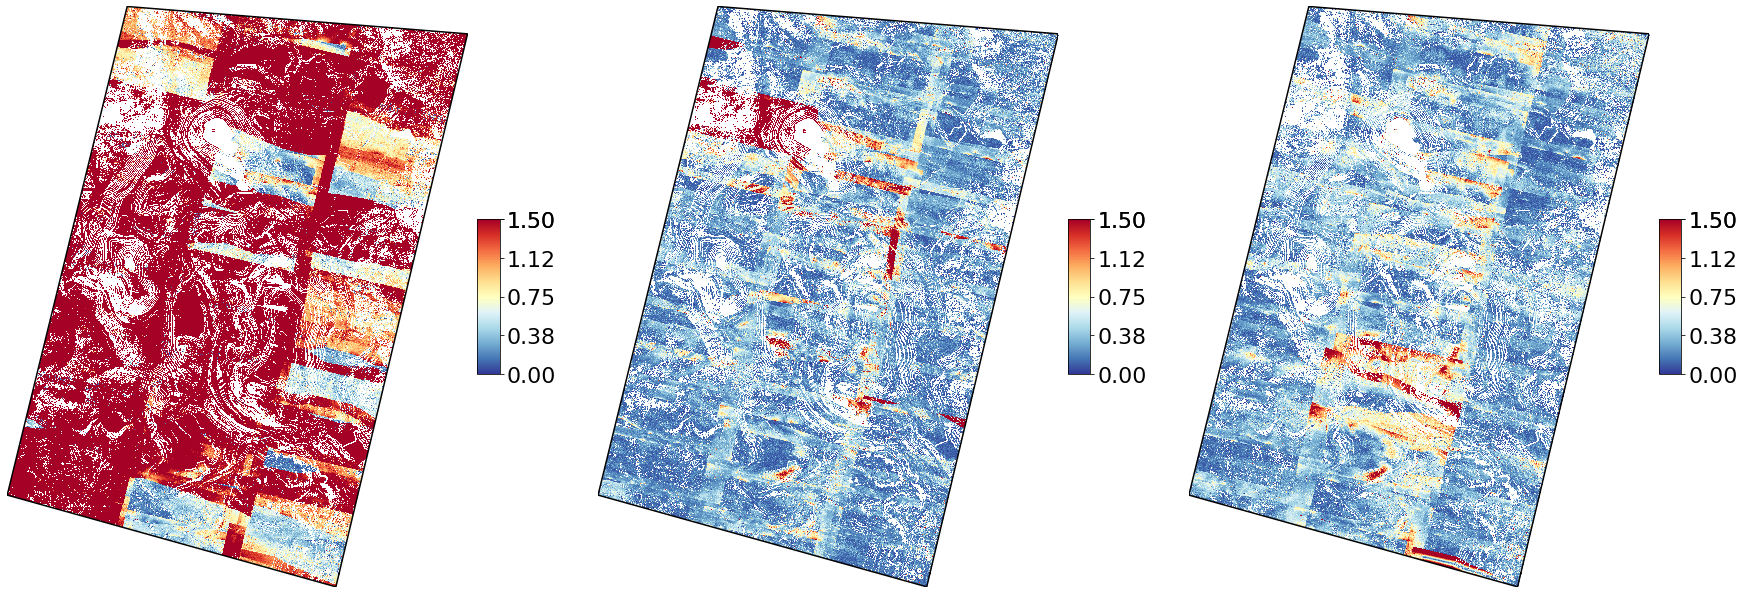

In [71]:
# compare two std images

print('running!')
#DATE_ID = '20200301_104837'
#file_1 = 'exp/coal_opencv/init/4D/metrics/std_per_date/{}.tif'.format(DATE_ID)
#file_2 = 'exp/coal_opencv/init/4D/pc3dr/metrics/std_per_date/{}.tif'.format(DATE_ID)
#file_3 = 'exp/coal_opencv/ba_seq_n0_60k_ALL/4D/metrics/std_per_date/{}.tif'.format(DATE_ID)

DATE_ID = '20190128_204710' #'20190127_175045' #'20190128_174855' #'20190128_204710' 
file_1 = 'exp/morenci_3t_60k/init_/4D/metrics/std_per_date/{}.tif'.format(DATE_ID)
file_2 = 'exp/morenci_3t_60k/init_/4D/pc3dr/metrics/std_per_date/{}.tif'.format(DATE_ID)
file_3 = 'exp/morenci_3t_60k/ba_seq_n0_60k_ALL/4D/metrics/std_per_date/{}.tif'.format(DATE_ID)

r = 0.8
c = 'RdYlBu_r'

std_1, aoi_1, _ = read_std_image(file_1, res=r)
std_2, aoi_2, _ = read_std_image(file_2, res=r)
std_3, aoi_3, _ = read_std_image(file_3, res=r)

stds = [std_1, std_2, std_3]
aois = [aoi_1, aoi_2, aoi_3]
vmin, vmax = 0.0, 1.5

from bundle_adjust import ba_utils
ba_utils.display_row_of_dsms(stds, vmin=vmin, vmax=vmax, c=c, aois=aois)

### visualize dsms

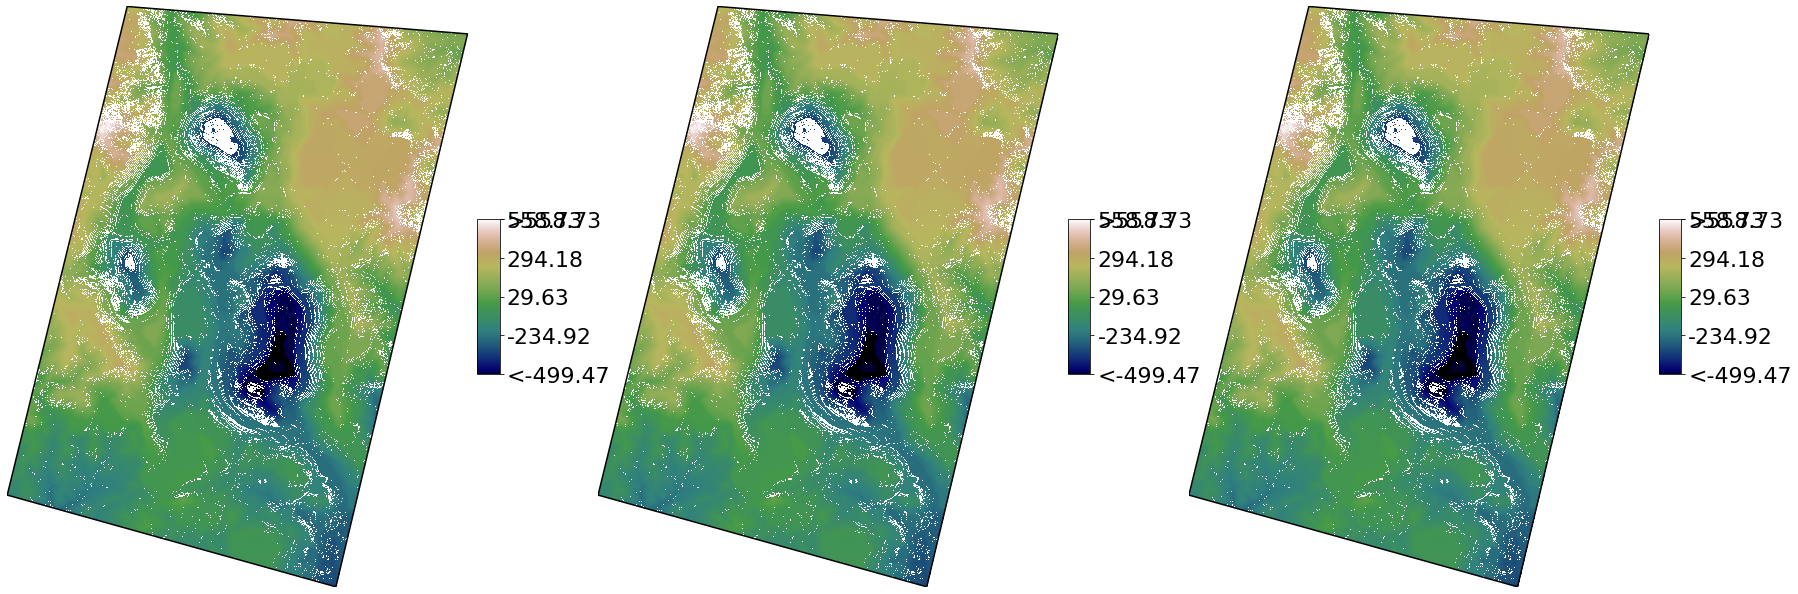

In [75]:
#DATE_ID = '20200301_104837'
#file_1 = 'exp/coal_opencv/init/4D/metrics/avg_per_date/{}.tif'.format(DATE_ID)
#file_2 = 'exp/coal_opencv/init/4D/pc3dr/metrics/avg_per_date/{}.tif'.format(DATE_ID)
#file_3 = 'exp/coal_opencv/ba_seq_n0_60k_ALL/4D/metrics/avg_per_date/{}.tif'.format(DATE_ID)

DATE_ID = '20190128_204710' #'20190127_175045' #'20190128_174855' #'20190128_204710' 
file_1 = 'exp/morenci_3t_60k/init_/4D/metrics/avg_per_date/{}.tif'.format(DATE_ID)
file_2 = 'exp/morenci_3t_60k/init_/4D/pc3dr/metrics/avg_per_date/{}.tif'.format(DATE_ID)
file_3 = 'exp/morenci_3t_60k/ba_seq_n0_60k_ALL/4D/metrics/avg_per_date/{}.tif'.format(DATE_ID)

dsms, aois = [], []
for f in [file_1, file_2, file_3]:
    std, aoi, offset = read_std_image(file_1, thr, res)
    dsms.append(std - offset)
    aois.append(aoi)

res = 0.8
thr = None
c = 'gist_earth'

vmin = np.nanpercentile(dsms[0], q=0.05)
vmax = np.nanpercentile(dsms[1], q=99.95)

from bundle_adjust import ba_utils
ba_utils.display_row_of_dsms(dsms, vmin=vmin, vmax=vmax+50, c=c, aois=aois)